In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical

# this module has the mnist data set
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
network = models.Sequential()

network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))

network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))

network.add(layers.Flatten())

network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

network.compile(optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
x_train = train_images[:42000]
x_val = train_images[42000:]

y_train = train_labels[:42000]
y_val = train_labels[42000:]

In [ ]:
history = network.fit(x_train, y_train, epochs=20, batch_size=64, validation_data = (x_val, y_val))

Epoch 1/20
657/657 [==============================] - 4s 5ms/step - loss: 0.2152 - accuracy: 0.9325 - val_loss: 0.0848 - val_accuracy: 0.9751
Epoch 2/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0563 - accuracy: 0.9819 - val_loss: 0.0511 - val_accuracy: 0.9851
Epoch 3/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0467 - val_accuracy: 0.9857
Epoch 4/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0474 - val_accuracy: 0.9868
Epoch 5/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0417 - val_accuracy: 0.9890
Epoch 6/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0593 - val_accuracy: 0.9865
Epoch 7/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0434 - val_accuracy: 0.9881
Epoch 

In [ ]:
test_results = network.evaluate(test_images, test_labels)
print(test_results)

313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9922
[0.06758013367652893, 0.9922000169754028]


In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

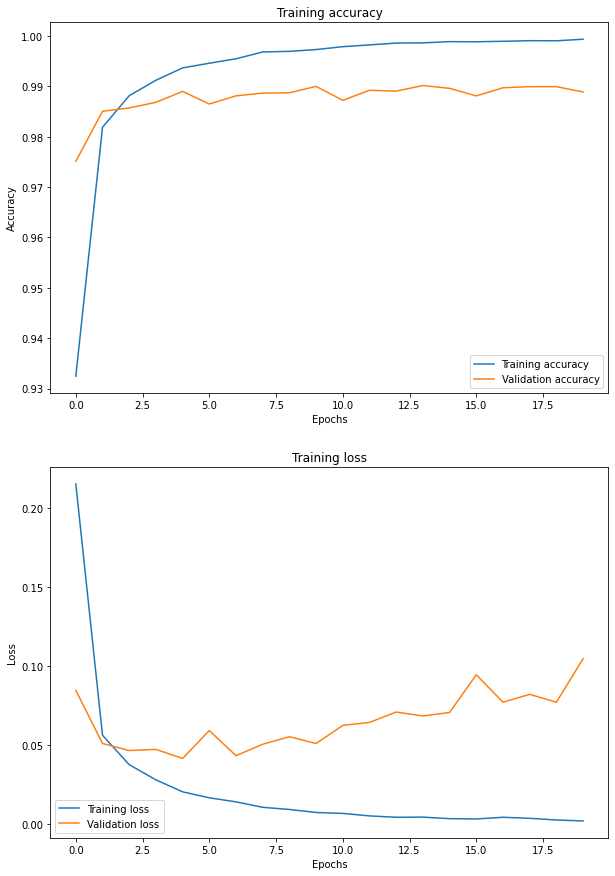

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(acc_values, label="Training accuracy")
ax[0].plot(val_acc_values, label="Validation accuracy")
ax[0].set_title("Training accuracy")
ax[0].legend(loc='lower right')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(loss_values, label="Training loss")
ax[1].plot(val_loss_values, label="Validation loss")
ax[1].set_title("Training loss")
ax[1].legend(loc='lower left')

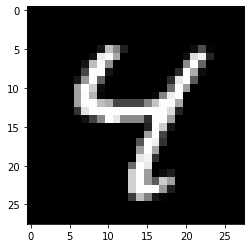

In [ ]:
test_image = test_images[6]
plt.imshow(test_image.reshape(28,28), cmap='gray')

(1, 28, 28, 1)


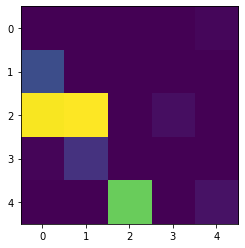

In [ ]:
layer_outputs = [layer.output for layer in network.layers]

activation_model = models.Model(inputs=network.input, outputs=layer_outputs)

test_image2 = test_image.reshape((1, 28, 28, 1))
print(test_image2.shape)
activations = activation_model.predict(test_image2)

plt.imshow(activations[3][0, :, :, 2])